**The Start Of It All...**

# Data and Libraries

In [1]:
#Change the width of the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import random

In [3]:
#Visualisation Libraries
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from pandas.plotting import scatter_matrix
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline
# Import supplementary visualizations code visuals.py
#import visuals as vs

In [4]:
# Import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score

#Import decision tree models
from sklearn import tree

#Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score

#Data Cleansing tools
from sklearn.preprocessing import MinMaxScaler

#Import PCA libraries
from sklearn.decomposition import PCA

In [5]:
# Load Company IP Intent Data (March Sample)
try:
    data = pd.read_csv("sample_model_data.csv")
    print("Company IP Intent dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded!")

Company IP Intent dataset has 283329 samples with 46 features each.


In [6]:
print(data.columns)

Index(['acct_id', 'hq_id', 'company', 'userDomain', 'city', 'region',
       'countryCode', 'revenue_mil_usd', 'total_employees', 'naic3', 'naic6',
       'isISP', 'usageType', 'datesCount', 'domainsCount', 'hitsSum',
       'pageViewsSum', 'uniqueViewsSum', 'clicks', 'clickDates',
       'hits_iabCat_IAB_1', 'hits_iabCat_IAB_2', 'hits_iabCat_IAB_3',
       'hits_iabCat_IAB_4', 'hits_iabCat_IAB_5', 'hits_iabCat_IAB_6',
       'hits_iabCat_IAB_7', 'hits_iabCat_IAB_8', 'hits_iabCat_IAB_9',
       'hits_iabCat_IAB_10', 'hits_iabCat_IAB_11', 'hits_iabCat_IAB_12',
       'hits_iabCat_IAB_13', 'hits_iabCat_IAB_14', 'hits_iabCat_IAB_15',
       'hits_iabCat_IAB_16', 'hits_iabCat_IAB_17', 'hits_iabCat_IAB_18',
       'hits_iabCat_IAB_19', 'hits_iabCat_IAB_20', 'hits_iabCat_IAB_21',
       'hits_iabCat_IAB_22', 'hits_iabCat_IAB_23', 'hits_iabCat_IAB_24',
       'hits_iabCat_IAB_25', 'hits_iabCat_IAB_26'],
      dtype='object')


# Data Exploration
In this sections I will attempt to find correlations in my data with summary statistics and visualations to help guide the supervised learning

In [7]:
# Display a description of the dataset
display(data.describe())

,revenue_mil_usd,total_employees,naic3,naic6,isISP,datesCount,domainsCount,hitsSum,pageViewsSum,uniqueViewsSum,...,hits_iabCat_IAB_17,hits_iabCat_IAB_18,hits_iabCat_IAB_19,hits_iabCat_IAB_20,hits_iabCat_IAB_21,hits_iabCat_IAB_22,hits_iabCat_IAB_23,hits_iabCat_IAB_24,hits_iabCat_IAB_25,hits_iabCat_IAB_26
count,2.832820e+05,2.832820e+05,259714.000000,259714.000000,283329.000000,283329.000000,283329.000000,2.833290e+05,2.833290e+05,2.833290e+05,...,283329.000000,283329.000000,283329.000000,283329.000000,283329.000000,283329.000000,283329.000000,283329.000000,283329.000000,283329.000000
mean,3.068344e+04,8.811377e+03,506.720812,507050.315666,0.005686,13.088463,62.876469,6.851885e+02,2.237784e+03,1.023844e+03,...,15.494563,13.733804,153.629925,1.403277,7.170226,60.085205,0.258283,4.576503,0.001479,3.636133
std,2.667776e+06,9.329454e+04,160.260001,160243.386485,0.075191,9.309487,193.603026,8.717555e+03,2.491374e+04,1.366620e+04,...,209.410742,353.543213,1779.818868,14.483640,80.048690,993.665199,2.679972,104.738310,0.145624,39.966514
min,0.000000e+00,0.000000e+00,110.000000,110000.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.803375e+00,4.000000e+01,420.000000,420000.000000,0.000000,5.000000,5.000000,1.100000e+01,2.000000e+01,1.400000e+01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.377931e+01,1.360000e+02,522.000000,522310.000000,0.000000,11.000000,15.000000,4.600000e+01,1.110000e+02,6.800000e+01,...,1.000000,0.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.359207e+02,7.500000e+02,611.000000,611110.000000,0.000000,20.000000,48.000000,1.910000e+02,5.260000e+02,2.910000e+02,...,5.000000,3.000000,44.000000,0.000000,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000
max,5.080000e+08,3.999993e+07,928.000000,928120.000000,1.000000,31.000000,13438.000000,2.261769e+06,6.541092e+06,3.889049e+06,...,66954.000000,150914.000000,523810.000000,4285.000000,9688.000000,242451.000000,332.000000,45876.000000,57.000000,8685.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [8]:
#Generate random samples to investigate
n=5
companies=len(data)
indices=[]
for i in range(0, n):
    indices.append(random.randint(0, companies))
print("Sample indices selected - ", str(indices))    
    
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of Company Intent customers dataset:")
display(samples)

Sample indices selected -  [227903, 37194, 220616, 190527, 109543]
Chosen samples of Company Intent customers dataset:


,acct_id,hq_id,company,userDomain,city,region,countryCode,revenue_mil_usd,total_employees,naic3,...,hits_iabCat_IAB_17,hits_iabCat_IAB_18,hits_iabCat_IAB_19,hits_iabCat_IAB_20,hits_iabCat_IAB_21,hits_iabCat_IAB_22,hits_iabCat_IAB_23,hits_iabCat_IAB_24,hits_iabCat_IAB_25,hits_iabCat_IAB_26
0,4-1NCI-531244,1-GHL4HH,Six Continents Hotels Inc,ihg.com,Wytheville,Virginia,US,1812.853000,30000.0,721.0,...,2,2,9,0,0,0,0,2,0,0
1,4-1NB0-88511,1-12JF7WQ,Bytelink AG,as1836.net,Brugg,Bern,CH,0.543757,3.0,511.0,...,0,0,0,0,0,2,0,0,0,0
2,1-S3SPT6,1-S3SPT6,Schafer & Weiner PC,schaferandweiner.com,Bloomfield Hills,Michigan,US,2.945900,24.0,541.0,...,2,3,13,0,0,4,0,0,0,0
3,1-PMSS2T,1-PMSS2T,"Palmetto State Transportation, LLC",palmettostatetrans.com,Greenville,South Carolina,US,2.925200,130.0,484.0,...,3,6,6,0,0,8,0,1,0,0
4,1-U98-2216,1-U98-2216,Hallmark Electronics Ltd.,hallmarkelectronics.com,Ellesmere,England,GB,18.611290,28.0,NaN,...,0,0,2,0,0,2,0,0,0,0


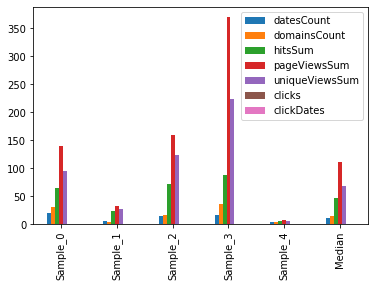

In [9]:
#Metric Columns
iabCat_hits_cols = [col for col in samples.columns if 'hits_iabCat' in col]
wantCols = ['datesCount', 'domainsCount', 'hitsSum','pageViewsSum', 'uniqueViewsSum', 'clicks', 'clickDates']

#Visualise Sample data
samples_for_plot = samples.copy()
samples_for_plot = samples_for_plot[wantCols]

#Add median plot as well
columnsN = len(samples_for_plot.columns)
samples_for_plot.loc[n + 1] = data.median()

#Create lables
labels=[]
for i in range(0, n):
    name = 'Sample_'+str(i)
    labels.append(name)    

labels.append('Median')    
    
#Plot graph
samples_for_plot.plot(kind='bar')
plt.xticks(range(n+1),labels)

# Update the plot
plt.show()


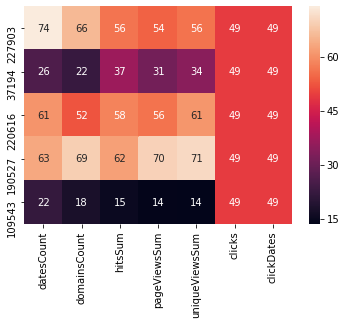

In [10]:
#REVIEWER NOTES : the quartiles probably serve as a better reference than mean. 
#For an even more refined comparison, you can use the following code to plot the percentile heatmap for sample points:
reducedData = data[wantCols]
percentiles_reducedData = 100*reducedData.rank(pct=True)
percentiles_samples = percentiles_reducedData.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)

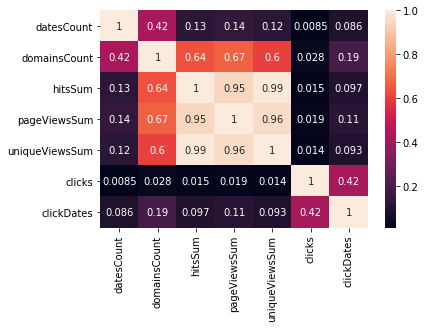

In [11]:
#Correlation heatmap!
sns.heatmap(reducedData.corr(),annot=True)

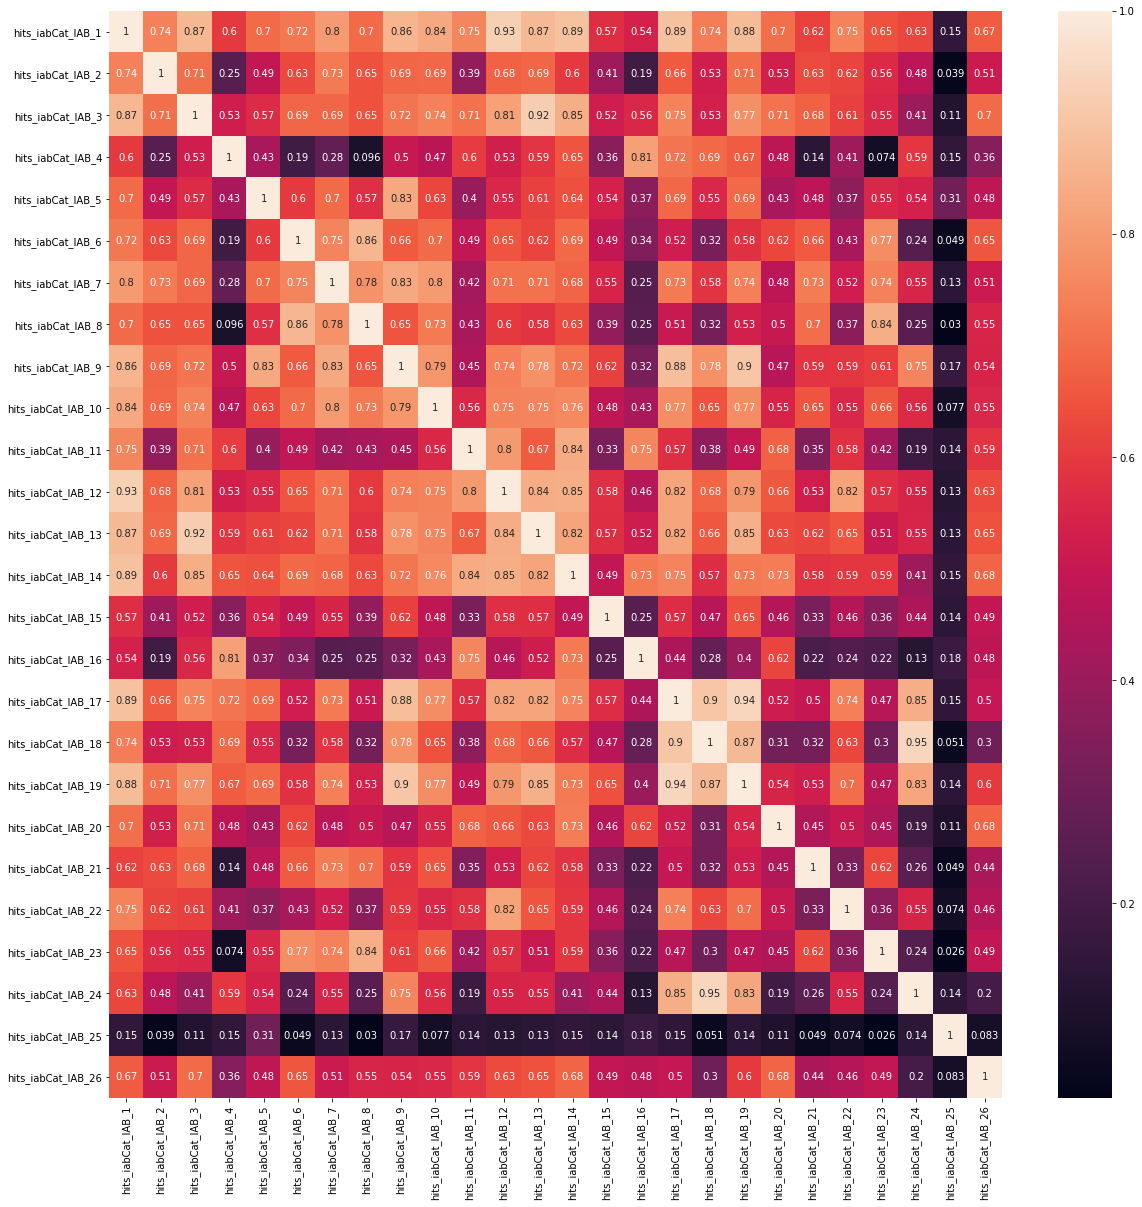

In [12]:
#Correlation heatmap with all IAB activity
iabCat_hits_cols = [col for col in samples.columns if 'hits_iabCat' in col]
#iabCat_hits_cols.append('clicks')
#iabCat_hits_cols.append('datesCount')
reducedData = data[iabCat_hits_cols]
plt.figure(figsize=(20, 20))
sns.heatmap(reducedData.corr(),annot=True)

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [13]:
#Load csv into a dataframe
new_data = pd.read_csv("sample_model_data.csv")
new_data = new_data[iabCat_hits_cols]

#Prepare target value
target = 'hits_iabCat_IAB_19'
#Returns a series for all the target values (same as keying a dict in kdb!)
target_data = new_data[target]
#Ravel series data as single column target
target_data = target_data.ravel()

#Drop target so we can use a feature
new_data.drop([target], axis = 1, inplace = True)
print("Wholesale customers dataset created to predict " + target +  " has {} samples with {} features each.".format(*new_data.shape))

#Clean and normalise data

Wholesale customers dataset created to predict hits_iabCat_IAB_19 has 283329 samples with 25 features each.


In [14]:
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size=0.25, random_state=10)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(max_depth=25)
regressor = regressor.fit(X_train,y_train)
print('DecisionTreeRegressor fit to training data')

# TODO: Report the score of the prediction using the testing set
testPredictions = regressor.predict(X_test)
testPredictions = testPredictions
print('DecisionTreeRegressor test predictions ran')

#Score must be relevant to a regressor(r2 score used)
score = regressor.score(X_test, y_test)

print(score)

DecisionTreeRegressor fit to training data
DecisionTreeRegressor test predictions ran
0.8067572990745913


# Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [ ]:
# Produce a scatter matrix for each pair of features in the data
#scatter_matrix(data, alpha = 0.3, figsize = (20,12), diagonal = 'kde');

axes = scatter_matrix(new_data, alpha = 0.3, figsize = (40,40), diagonal = 'kde')
corr = new_data.corr().values
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

1. Distribution of all the data features are extremley skewed to the right as displayed by the high frequency of values on the far left and extreme values to the right.

2. There appears to be a few linearly correlated pairs. (Grocery + detergient) and (Grocery + Milk)

3. The correlation matrix adds evidence to my hypothesis before that there is no correlation between "Fresh" and any of the other data points. Shown by no recognisable, linear or otherwise, relationship in 2D.

4. Fresh is is densly populated below 2000 with some significant outliers past 4000

## Data Preprocessing
Implementation: Feature Scaling¶
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:

Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.
Assign a copy of the sample data to log_samples after applying logarithmic scaling. Again, use np.log.

In [ ]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x+1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x+1))

# Produce a scatter matrix for each pair of newly-transformed features
#scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

axes = scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().values
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [ ]:
#Often, when we have right-skewed data it approximates a log-normal distribution. 
#It's for this reason that we normalize it in the next section with a log-transformation.
#However, there are cases where the log-transform doesn't get us as close to normal as we'd like.
#Another option in that case is the BoxCox transformation.

from scipy.stats import boxcox
boxcox_data = data.apply(lambda x: boxcox(x)[0])
pd.scatter_matrix(boxcox_data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [ ]:
#Testing
feature = 'Fresh'
Q1 = np.percentile(log_data[feature],25)
Q3 = np.percentile(log_data[feature],75)
step = (Q3 - Q1)*1.5
#Outlier if value step below lower quartile OR step above upper quartile
featureOutliers = log_data[(log_data[feature] <= Q1 - step) | (log_data[feature] >= Q3 + step)]
outlierIDXs = featureOutliers.index.tolist()
print((outlierIDXs))

In [ ]:
#Initialise outliers
outliersIDX = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5

    #Outlier if value step below lower quartile OR step above upper quartile
    featureOutliers = log_data[(log_data[feature] <= Q1 - step) | (log_data[feature] >= Q3 + step)]
    outlierIDXs = featureOutliers.index.tolist()
    print("Number of outliers detected for feature - " + str(feature) + " = " +str(len(featureOutliers)))
   
    #Add to global list of outliersIDXs
    outliersIDX.extend(outlierIDXs)

In [ ]:
#User counter to check frequencies (https://pymotw.com/2/collections/counter.html)
from  collections import Counter
countsDict = dict(Counter(outliersIDX))

#Capture multi-feature outliers
multiOutliers=[]

for idx in list(countsDict.keys()):
    if countsDict[idx] > 1:
        multiOutliers.append(idx)
        print('Multi-Feature outlier found at index = ' + str(idx))
        
print('Total multi-Feature outliers found = ' + str(len(multiOutliers)))


#np.where(countsDict.value > 1)

In [ ]:
# OPTIONAL: Select the indices for data points you wish to remove
outliersIDX = multiOutliers
print('Total outliers detected = '+str(len(outliersIDX)) + ' out of a total sample of ' + str(len(log_data)))
outliers  = outliersIDX

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print(len(good_data))

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [ ]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
components = np.unique(good_data.keys())
display(components)
print('Total dataset components = ' + str(len(components)))

pca = PCA(n_components=len(components)).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

#np.cumsum(pca.explained_variance_ratio_)

In [ ]:
print(pca_results['Explained Variance'].cumsum())

In [ ]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [ ]:
# TODO: Apply PCA by fitting the good data with only 2 dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [ ]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

In [ ]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [ ]:
#Import clustering libaries (https://scikit-learn.org/stable/modules/clustering.html0)
from sklearn.cluster import DBSCAN, KMeans

#import metris to evaluate clusters
from sklearn.metrics import silhouette_score

In [ ]:
#Example https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2,random_state=1).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers (not applicable to DB scan)
centers = clusterer.cluster_centers_ 
display(centers)

# TODO: Predict the cluster for each transformed sample data point
sample_preds =  clusterer.predict(pca_samples)
display(sample_preds)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print(score)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [ ]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [ ]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers and remove the 1 from earlier (used to prevent log 0 error)
true_centers = np.exp(log_centers) - 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)